In [9]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
from sim_result_processor import TableProcessor

In [5]:
with open('./sim_result.json', 'r') as file:
    html_content = json.load(file)

In [6]:
html = html_content['delta_0_1_cauchy']
sim_result = TableProcessor(html_table=html)
sim_result.table_processor()
sim_result.toarray()
print(sim_result.methods)
print(sim_result.nparray.shape)
print(sim_result.df)

0                   Huber
1                     OLS
2       clarkson_woodruff
3                  normal
4               proposal1
5     proposal1(adaptive)
6               proposal2
7     proposal2(adaptive)
8             sparse_sign
9           uniform_dense
10         uniform_sparse
Name: (k, sketch), dtype: object
(2, 11, 4)
                   20                 40                 80                160
   Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1
0     0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000
1     0.0017 ± 0.0002    0.0017 ± 0.0002    0.0017 ± 0.0002    0.0017 ± 0.0002
2     5.8899 ± 0.8172    0.1048 ± 0.0127    0.0314 ± 0.0033    0.0143 ± 0.0016
3     8.3542 ± 1.1629    0.1067 ± 0.0123    0.0377 ± 0.0042    0.0151 ± 0.0015
4     1.0500 ± 0.1498    0.0100 ± 0.0006    0.0030 ± 0.0002    0.0015 ± 0.0001
5     0.9964 ± 0.1418    0.0105 ± 0.0007    0.0038 ± 0.0003    0.0016 ± 0.0001
6   68.4596 ± 10.1427    0.0077 ± 0.00

# Plot the Table

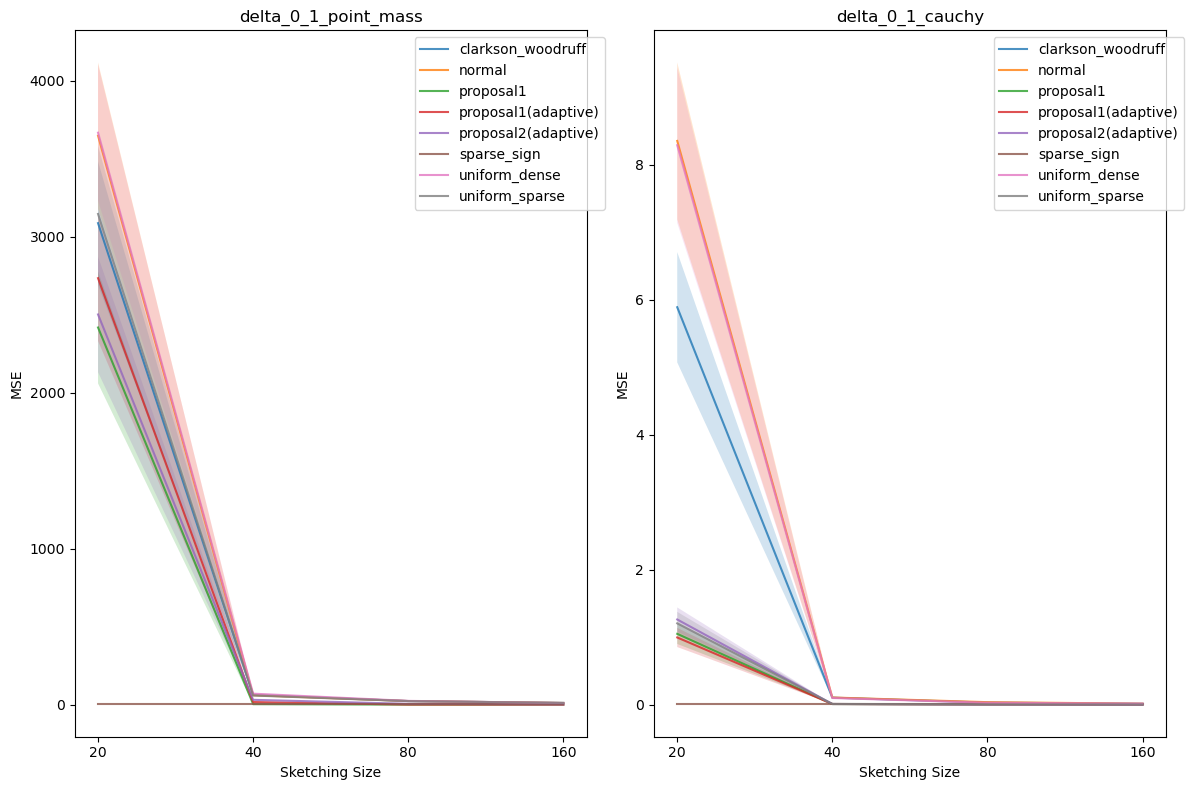

In [10]:
x = np.linspace(0, 10, 4)
new_x_labels = [20, 40, 80, 160]
method_exclude = set(['Huber', 'OLS', 'proposal2'])
tables_to_extract = ['delta_0_1_point_mass', 'delta_0_1_cauchy']

row = 1
col = 2
fig, axes = plt.subplots(row, col, figsize=(12, 8))
axes = axes.ravel()  # flatten the axes array

for i in range(2):
    table_name = tables_to_extract[i]
    sim_result = TableProcessor(html_table=html_content[table_name])
    sim_result.table_processor()
    sim_result.toarray()

    for j, method in enumerate(sim_result.methods):
        if method in method_exclude: continue
        y_estimate = sim_result.nparray[0,j,:]
        y_lower = sim_result.nparray[0,j,:] - sim_result.nparray[1,j,:]
        y_upper = sim_result.nparray[0,j,:] + sim_result.nparray[1,j,:]
        
        axes[i].plot(x, y_estimate, label=f'{method}', linestyle='-', alpha=0.8)
        axes[i].fill_between(x, y_lower, y_upper, alpha=0.2)  # Confidence interval shading

    axes[i].set_title(table_name)
    axes[i].set_xlabel('Sketching Size')
    axes[i].set_ylabel('MSE')
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(new_x_labels)

plt.tight_layout()
plt.show()
